# Plot model output

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
import dfm_tools as dfmt
import os

c:\Users\aleksand\AppData\Local\mambaforge\envs\dfm_tools_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
#set paths and parameters per model
#the necessary data is automatically downloaded from opendap if needed
dir_runs = r'p:\11210471-001-compass\02_Models\Delft3DFM\mozambique_model\computations'
model = 'mozambique_spw_Idai_areaBeira' 

for fname in os.listdir(os.path.join(dir_runs,model,'output')):
    if fname.endswith('_his.nc'):
        file_nc_his = os.path.join(dir_runs,model,'output',fname)
    elif fname.endswith('_0000_map.nc'):
        file_nc_map = os.path.join(dir_runs,model,'output',fname)

In [15]:

rename_mapvars = {}
sel_slice_x, sel_slice_y = slice(None,None), slice(None,None)
layer = None
crs = None
raster_res = 100
umag_clim = None
scale = 1
line_array = None

In [16]:
#open hisfile with xarray and print netcdf structure
if file_nc_his is not None:
    ds_his = xr.open_mfdataset(file_nc_his, preprocess=dfmt.preprocess_hisnc)

In [17]:
ds_his.stations

<xarray.DataArray 'stations' (stations: 214)> Size: 15kB
array(['BAZARUTOIHO', 'CHILOANEIHO', 'QUELIMANEIHO', ..., 'overland_074',
       'overland_075', 'overland_076'], dtype='<U18')
Coordinates:
    station_x_coordinate  (stations) float64 2kB 35.43 34.88 ... 34.77 34.76
    station_y_coordinate  (stations) float64 2kB -21.65 -20.62 ... -19.75 -19.75
  * stations              (stations) <U18 15kB 'BAZARUTOIHO' ... 'overland_076'

In [18]:
ds_his_sel = ds_his.sel(stations=['BEIRAIHO','BAZARUTOIHO','CHINDEIHO','PEBANEIHO'])
#ds_his_sel = ds_his.where((ds_his.station_x_coordinate>34) & (ds_his.station_x_coordinate<37.5) & (ds_his.station_y_coordinate>-22) & (ds_his.station_y_coordinate<-18.1),drop=True)
ds_his_sel

<xarray.Dataset> Size: 578kB
Dimensions:                                  (stations: 4,
                                              station_geom_nNodes: 214,
                                              time: 1009)
Coordinates:
    station_x_coordinate                     (stations) float64 32B 34.83 ......
    station_y_coordinate                     (stations) float64 32B -19.82 .....
  * time                                     (time) datetime64[ns] 8kB 2019-0...
  * stations                                 (stations) <U18 288B 'BEIRAIHO' ...
Dimensions without coordinates: station_geom_nNodes
Data variables: (12/53)
    wgs84                                    int32 4B ...
    station_id                               (stations) |S256 1kB dask.array<chunksize=(4,), meta=np.ndarray>
    station_geom                             int32 4B ...
    station_geom_node_count                  (stations) int32 16B dask.array<chunksize=(4,), meta=np.ndarray>
    station_geom_node_coordx                 (station_geom_nNodes) float64 2kB dask.array<chunksize=(214,), meta=np.ndarray>
    station_geom_node_coordy                 (station_geom_nNodes) float64 2kB dask.array<chunksize=(214,), meta=np.ndarray>
    ...                                       ...
    water_balance_Qext_out_2D                (time) float64 8kB dask.array<chunksize=(1009,), meta=np.ndarray>
    water_balance_Qext_total_2D              (time) float64 8kB dask.array<chunksize=(1009,), meta=np.ndarray>
    water_balance_total_volume_interception  (time) float64 8kB dask.array<chunksize=(1009,), meta=np.ndarray>
    water_balance_evaporation_interception   (time) float64 8kB dask.array<chunksize=(1009,), meta=np.ndarray>
    water_balance_precipitation_on_ground    (time) float64 8kB dask.array<chunksize=(1009,), meta=np.ndarray>
    timestep                                 (time) float64 8kB dask.array<chunksize=(1009,), meta=np.ndarray>
Attributes:
    institution:               Deltares
    references:                https://www.deltares.nl
    source:                    1.2.184.4a31aea51d1d200d4eb2f3262c805687584974...
    history:                   Created on 2024-08-28T14:18:16+0200, D-Flow FM
    date_created:              2024-08-28T14:18:16+0200
    date_modified:             2024-08-28T14:18:16+0200
    Conventions:               CF-1.5 Deltares-0.1 ACDD-1.3
    uuid:                      ad2e209a-1ee3-b743-8aff-d8dbfb8704cb
    time_coverage_start:       2019-03-09T00:00:00+00:00
    time_coverage_end:         2019-03-16T00:00:00+00:00
    time_coverage_duration:    P0000-00-07T00:00:00
    time_coverage_resolution:  P0000-00-00T00:10:00

>> reading coastlines: 7.26 sec
>> reading country borders: 0.09 sec


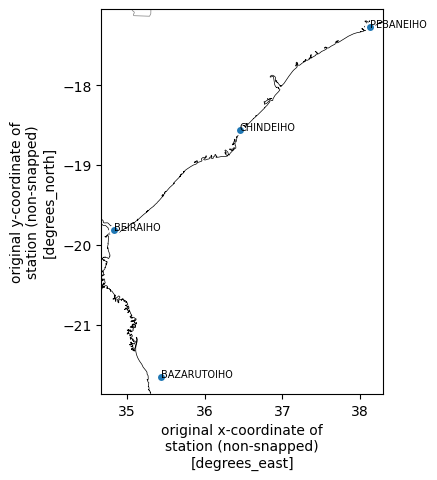

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ds_his_sel.plot.scatter(ax=ax, x='station_x_coordinate', y='station_y_coordinate', marker="o")
for tt,txt in enumerate(ds_his_sel.stations.values):
    plt.text(ds_his_sel.station_x_coordinate.values[tt],ds_his_sel.station_y_coordinate.values[tt],txt,size=7)
dfmt.plot_coastlines(ax=ax, min_area=1000, linewidth=0.5, zorder=0)
dfmt.plot_borders(ax=ax, zorder=0)


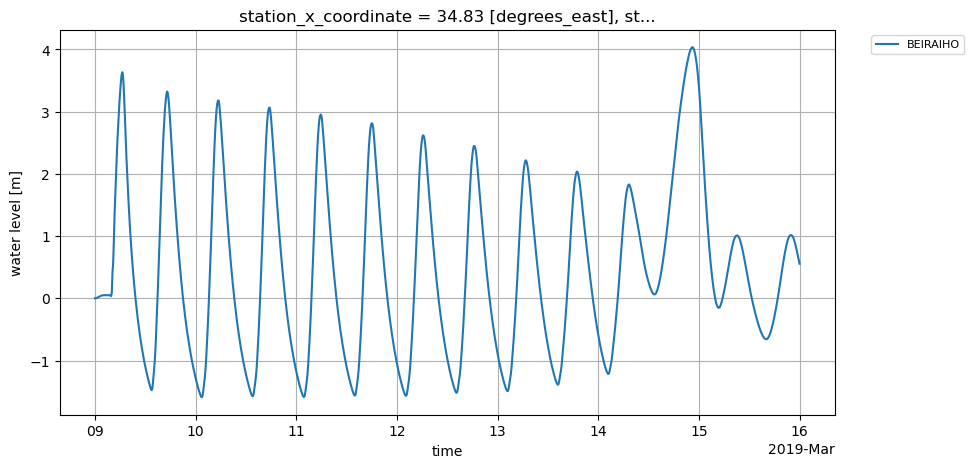

In [19]:
if file_nc_his is not None:
    fig, ax = plt.subplots(1,1,figsize=(10,5))
    ds_his_sel.sel(stations=['BEIRAIHO']).waterlevel.plot.line(ax=ax, x='time')
    ax.legend(ds_his_sel.stations.to_series(),bbox_to_anchor=(1.04, 1),loc="upper left",fontsize=8) 
    plt.grid()

In [13]:
ds_his_sel_gtsm=ds_his_sel

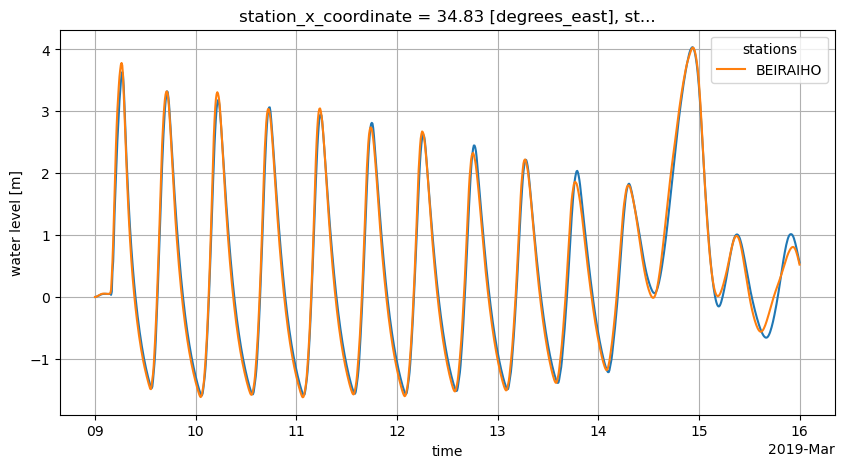

In [21]:
if file_nc_his is not None:
    fig, ax = plt.subplots(1,1,figsize=(10,5))
    ds_his_sel.sel(stations=['BEIRAIHO']).waterlevel.plot.line(ax=ax, x='time')
    ds_his_sel_gtsm.sel(stations=['BEIRAIHO']).waterlevel.plot.line(ax=ax, x='time')
    plt.grid()